# Project: Smoothing
![](title_pict/smoothing2.png)

Smoothing is used to reduce the impact of fluctuations such as spikes or errors.
- Smoothed values deviate from actual data points, yet they encapsulate the overall behavioral trends within the dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Data
In this project, we will use the following Apple daily stock price data for a particular period of time.

In [2]:
# the opening price at the beginning of each day
open = [182.60232902746063,
 182.31272011600538,
 184.89999389648438,
 185.44000244140625,
 187.50999450683594,
 187.91000366210938,
 190.47000122070312,
 189.50999450683594,
 189.3300018310547,
 191.08999633789062,
 192.27000427246094,
 190.97999572753906,
 188.82000732421875,
 191.50999450683594,
 189.61000061035156,
 190.75999450683594,
 191.44000244140625,
 192.89999389648438,
 194.63999938964844,
 195.39999389648438,
 195.69000244140625,
 194.64999389648438]

In [3]:
# the closing price at the end of each day
close = [182.4924774169922,
 184.32000732421875,
 183.0500030517578,
 186.27999877929688,
 187.42999267578125,
 189.72000122070312,
 189.83999633789062,
 189.8699951171875,
 191.0399932861328,
 192.35000610351562,
 190.89999389648438,
 186.8800048828125,
 189.97999572753906,
 189.99000549316406,
 190.2899932861328,
 191.2899932861328,
 192.25,
 194.02999877929688,
 194.35000610351562,
 195.8699951171875,
 194.47999572753906,
 196.88999938964844]

In [4]:
# The lowest price reached during each day.
low = [181.20421623621485,
 181.86333268844692,
 182.1300048828125,
 184.6199951171875,
 186.2899932861328,
 187.3699951171875,
 189.66000366210938,
 189.17999267578125,
 189.00999450683594,
 190.9199981689453,
 190.27000427246094,
 186.6300048828125,
 188.0399932861328,
 189.10000610351562,
 189.50999450683594,
 190.6300048828125,
 189.91000366210938,
 192.52000427246094,
 193.02999877929688,
 194.8699951171875,
 194.1699981689453,
 194.13999938964844]

In [5]:
# The highest price reached during each day.
high = [182.82203224839753,
 184.4098817621062,
 185.08999633789062,
 187.10000610351562,
 188.3000030517578,
 190.64999389648438,
 191.10000610351562,
 190.80999755859375,
 191.9199981689453,
 192.72999572753906,
 192.82000732421875,
 191.0,
 190.5800018310547,
 193.0,
 192.25,
 192.17999267578125,
 192.57000732421875,
 194.99000549316406,
 195.32000732421875,
 196.89999389648438,
 196.5,
 196.94000244140625]

In [6]:
# number of days
N = len(high)
N

22

In [7]:
# the list of days
days = ['day_'+str(i) for i in range(1, N+1)]
days

['day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'day_7',
 'day_8',
 'day_9',
 'day_10',
 'day_11',
 'day_12',
 'day_13',
 'day_14',
 'day_15',
 'day_16',
 'day_17',
 'day_18',
 'day_19',
 'day_20',
 'day_21',
 'day_22']

### Stock Behavior
The list indicating the behavior of stock prices as Increasing, Decreasing, or Flat.

In [8]:
change = []
for i in range(N):
    if close[i] > open[i]:
        change.append('Inc')
    elif close[i] < open[i]:
        change.append('Dec')
    else:
        change.append('Flat')

change

['Dec',
 'Inc',
 'Dec',
 'Inc',
 'Dec',
 'Inc',
 'Dec',
 'Inc',
 'Inc',
 'Inc',
 'Dec',
 'Dec',
 'Inc',
 'Dec',
 'Inc',
 'Inc',
 'Inc',
 'Inc',
 'Dec',
 'Inc',
 'Dec',
 'Inc']

### Candlestick
Candlesticks are used to identify patterns in stock data.
- Red color indicates a decrease, while green color indicates an increase.
- The lower and upper parts of the rectangle represent the opening and closing values.
- The lower and upper parts of the line represent the lowest and highest values.

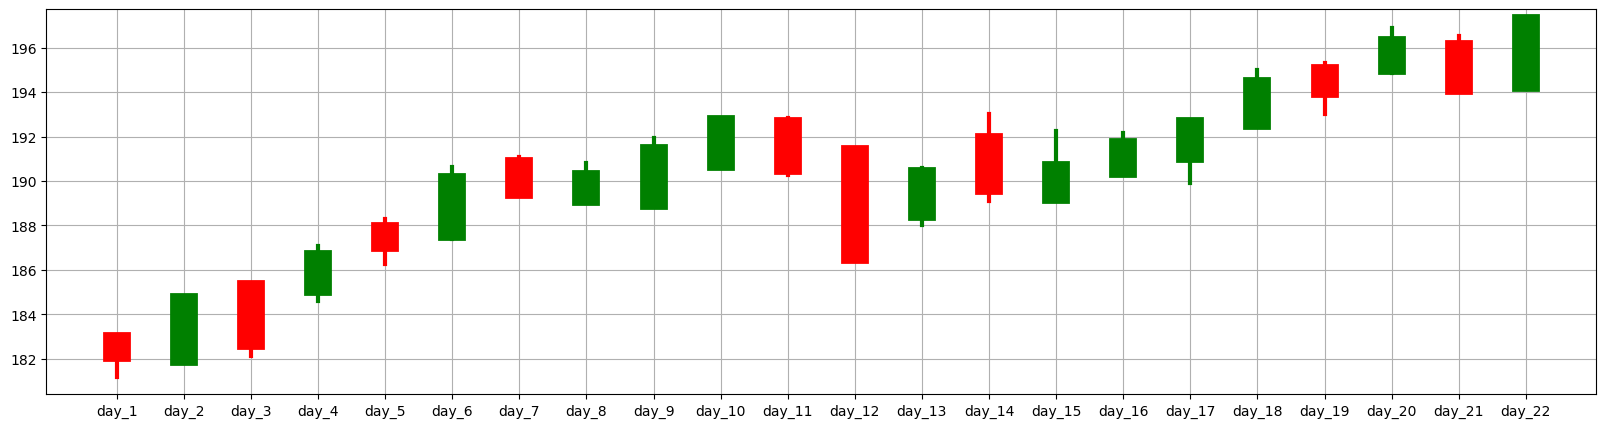

In [9]:
plt.figure(figsize=(20,5))

for i in range(N):
    
    if change[i] == 'Inc':
        col = 'green'
    elif change[i] == 'Dec':
        col = 'red'
    else:
        col = 'blue'
        
    plt.plot([days[i],days[i]],[open[i], close[i]], c=col, linewidth=20)
    plt.plot([days[i],days[i]],[low[i], high[i]], c=col, linewidth=3)
  
plt.grid()

### SMA
- Simple Moving Average 
- SMA calculates the average value within a chosen time frame.
- All values are weighted equally, without distinction between old and new data points.
- $SMA_k$ is represents the sequence of the average of k consecutive values of the original data
- Formula:
$\displaystyle SMA_k =  \frac{x_n+x_{n+1}+x_{n+2}+...+x_{n+k-1}}{k}$
- For the first  k−1 values, there is no average value because there are fewer than k values available.
- The first k−1 values of $SMA_k$ are NaN (Not a Number).

In [10]:
def sma(seq, k):
    sma_list = [np.nan]*(k-1)
    for n in range(len(seq)-k+1):
        sma_list.append(sum(seq[n:n+k])/k)
    return sma_list

In [11]:
len(sma(close, 3))

22

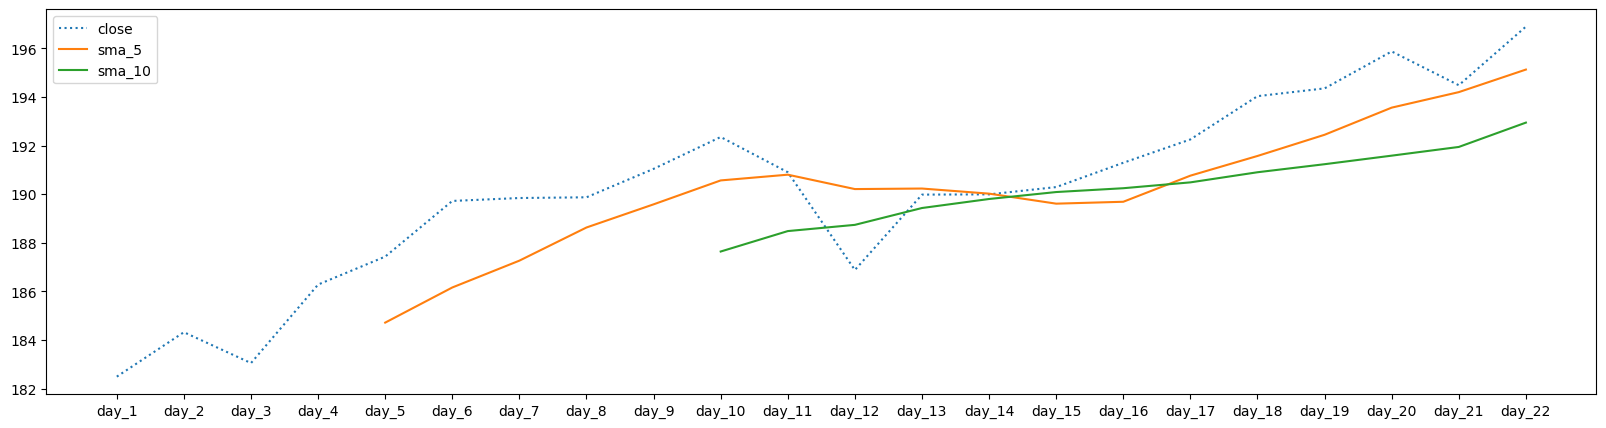

In [12]:
plt.figure(figsize=(20,5))
plt.plot(days, close, label='close', linestyle='dotted')
plt.plot(sma(close, 5), label='sma_5')
plt.plot(sma(close, 10), label='sma_10')
plt.legend();

#### Moving Average Signals

- A buy signal happens when the shorter-term moving average (MA) crosses above the longer-term MA, indicating an upward trend shift known as a "golden cross".
- A sell signal occurs when the shorter-term moving average (MA) crosses below the longer-term MA, signaling a downward trend shift known as a "death cross".

**Reference:** [www.investopedia.com](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp#:~:text=Moving%20averages%20with%20a%20shorter,of%20potential%20support%20or%20resistance)

- There are two intersections between the $SMA_2$ and $SMA_4$  graphs.

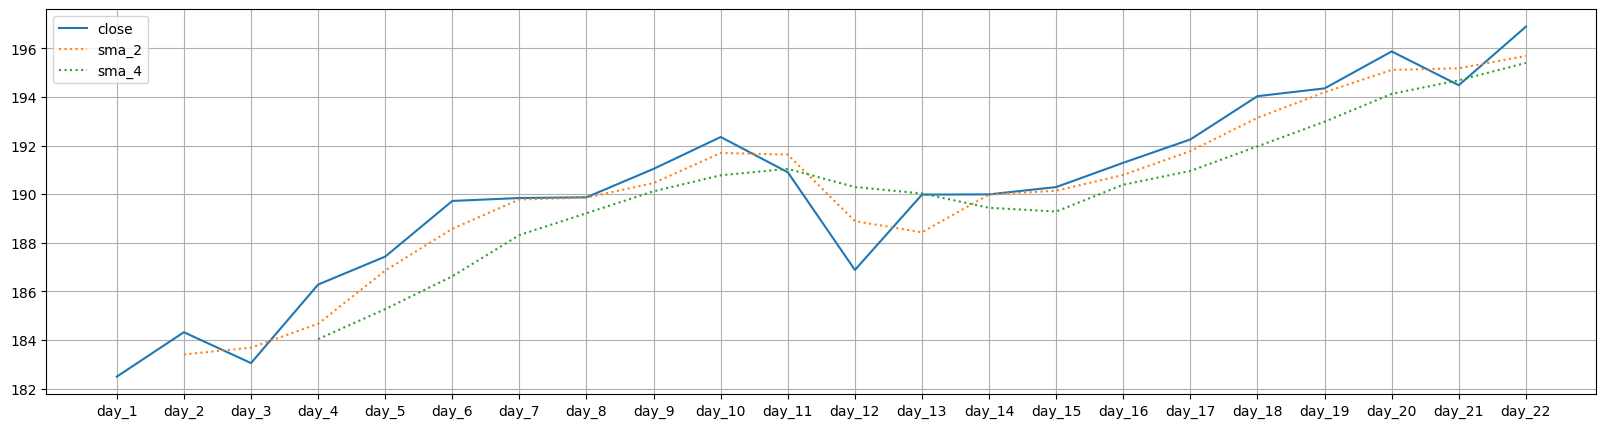

In [13]:
plt.figure(figsize=(20,5))
plt.plot(days, close, label='close')
plt.plot(sma(close, 2), label='sma_2', linestyle='dotted')
plt.plot(sma(close, 4), label='sma_4', linestyle='dotted')
plt.xticks(range(len(days)), days)
plt.grid()
plt.legend();

In [14]:
for i in range(len(close)-1):
    if (sma(close, 2)[i] > sma(close, 4)[i]) & (sma(close, 2)[i+1] < sma(close, 4)[i+1]):
        print(f'Death cross  : day_{i+1} -- day_{i+2}')
    if (sma(close, 2)[i] < sma(close, 4)[i]) & (sma(close, 2)[i+1] > sma(close, 4)[i+1]):
        print(f'Golden Crsoss: day_{i+1} -- day_{i+2}')

Death cross  : day_11 -- day_12
Golden Crsoss: day_13 -- day_14


### WMA
- Weighted Moving Average 

- WMA computes the weighted average value over a specified time period.
- Unlike SMA, the weights assigned to values may vary, with newer data points potentially carrying more significance than older ones.
- The influence of new points surpasses that of old points.

$\displaystyle WMA_k =  \frac{x_n + 2x_{n+1} + 3x_{n+2} + ... + kx_{n+k-1}}{1 + 2 + ... + k}$

In [15]:
def wma(seq, k):
    wma_list = [np.nan]*(k-1)
    for n in range(len(seq)-k+1):
        
        num = 0
        for i in range(k):
            num += (i+1)*seq[n+i]
            
        den = sum(range(1,k+1))
        wma_list.append(num/den)
    return wma_list

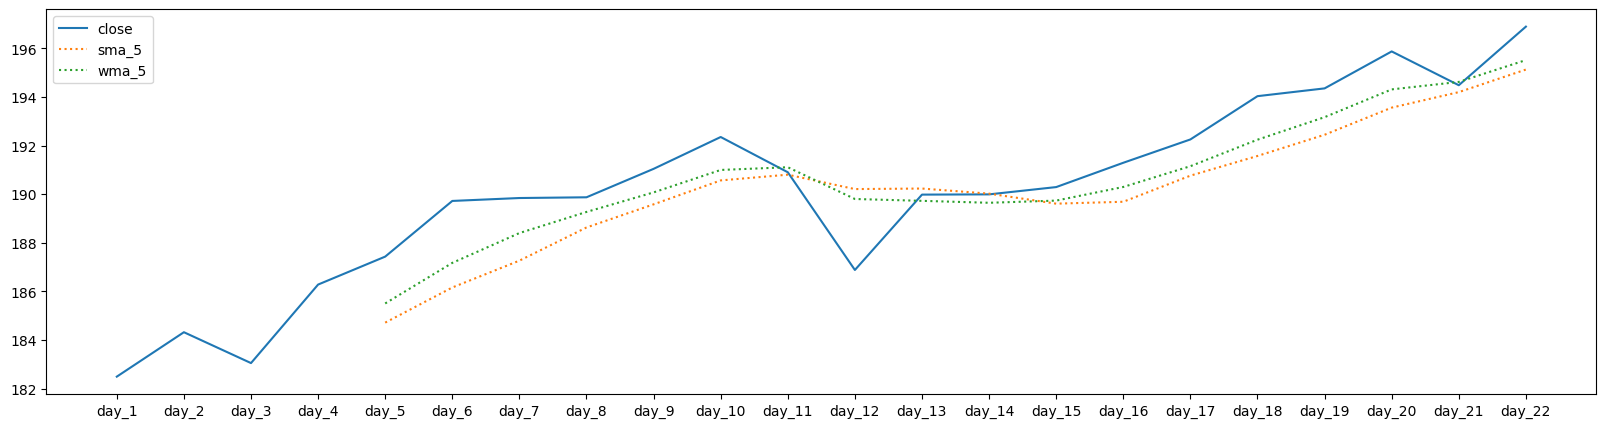

In [16]:
plt.figure(figsize=(20,5))
plt.plot(days, close, label='close')
plt.plot(sma(close, 5), label='sma_5', linestyle='dotted')
plt.plot(wma(close, 5), label='wma_5', linestyle='dotted')
plt.legend();

### EWA
- Exponential Weighted Average
  
$ s_0 = x_0 $

$ s_t = \alpha x_t +(1-\alpha) s_{t-1}$ for $t>0$

where $\alpha$ is between 0 and 1.

$ s_0 = x_0 $  
$ s_1 =  \alpha x_1 + (1-\alpha)s_0 = \alpha x_1 + (1-\alpha)x_0$  
$ s_2 =  \alpha x_2 + (1-\alpha)s_1 = \alpha x_2 + (1-\alpha)(\alpha x_1 + (1-\alpha)x_0) = \alpha x_2 + (1-\alpha)\alpha x_1 + (1-\alpha)^2x_0$

In [17]:
def ewa(seq, alpha):
    s = [seq[0]]
    for n in range(1,len(seq)):
        s.append(alpha*seq[n]+(1-alpha)*s[-1])
    return s

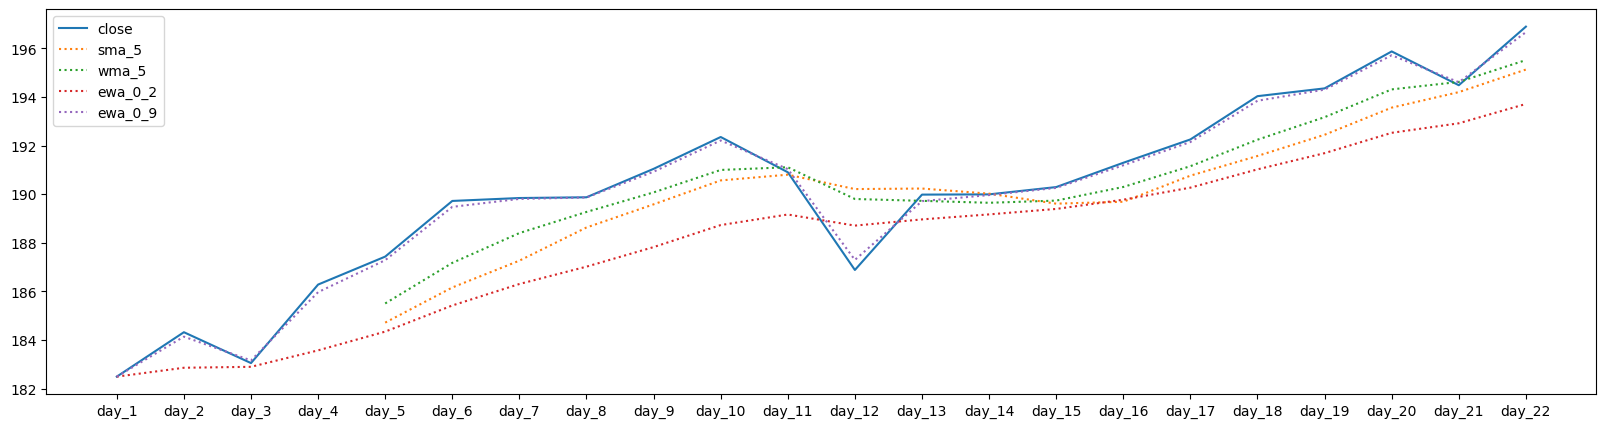

In [18]:
plt.figure(figsize=(20,5))
plt.plot(days, close, label='close')
plt.plot(sma(close, 5), label='sma_5', linestyle='dotted')
plt.plot(wma(close, 5), label='wma_5', linestyle='dotted')
plt.plot(ewa(close, 0.2), label='ewa_0_2', linestyle='dotted')
plt.plot(ewa(close, 0.9), label='ewa_0_9', linestyle='dotted')
plt.legend();

### AEWA
Adjusted Exponential Weighted Average
- Similar to WMA, but with different weights.
- It is calculated using weights: $1, (1-\alpha), (1-\alpha)^2, (1-\alpha)^3, ...$
  
- $\displaystyle AEWA_k =  \frac{(1-\alpha)^{k-1}x_n + (1-\alpha)^{k-2}x_{n+1} + ... +(1-\alpha)x_{n+k-2} + x_{n+k-1}}{ (1-\alpha)^{k-1}+(1-\alpha)^{k-2}+...+(1-\alpha)+1}$

**Example**
If k = 5,

$\displaystyle AEWA_5 =  \frac{(1-\alpha)^{4}x_n +(1-\alpha)^{3}x_{n+1}+(1-\alpha)^{2}x_{n+2}+(1-\alpha)x_{n+3}+x_{n+4}}
{ (1-\alpha)^{4}+(1-\alpha)^{3}+(1-\alpha)^{2}+(1-\alpha)+1}$

In [19]:
def aewa(seq, k, alpha):
    aewa_list = [np.nan]*(k-1)
    for n in range(len(seq)-k+1):
        
        num = 0
        for i in range(k):
            num += seq[n+i]*(1-alpha)**(k-i-1)
            
        den = sum([(1-alpha)**(k-i) for i in range(1,k+1)])
        aewa_list.append(num/den)
    return aewa_list

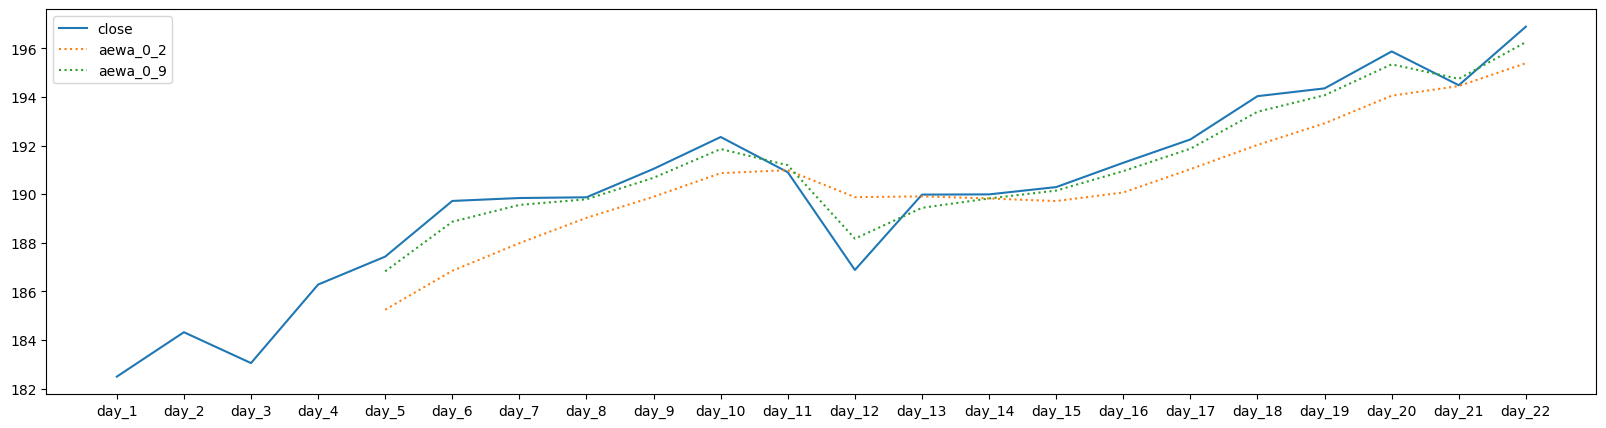

In [20]:
plt.figure(figsize=(20,5))
plt.plot(days, close, label='close')
plt.plot(aewa(close, 5, 0.2), label='aewa_0_2', linestyle='dotted')
plt.plot(aewa(close, 5, 0.7), label='aewa_0_9', linestyle='dotted')
plt.legend();

## Future work

Similar analyses can be conducted with additional data. To import stock data, you can use the yfinance package.

- Install it using `!pip3 install yfinance`.
- Use the stock symbol to import historical price data.
- For example, the symbol for Apple is AAPL, which is used in the following code to import data from '1/1/2010' to '12/31/2023'.

In [21]:
import yfinance as yf
apple_data = yf.Ticker('AAPL').history(start='2010-1-1', end='2023-12-31')
apple = apple_data['Close'].tolist()
len(apple)

3522

- The list apple has a length of 3,522.
- You can use 50 and 200 periods for SMA to identify potential golden and death crosses.